In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 80% !important; }</style>"))

In [3]:
import sys
import time
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import colors

In [4]:
myColors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
            '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',
            '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 
            '#307D7E', '#000000', "#DDEFFF", "#000035", "#7B4F4B", 
            "#A1C299", "#300018", "#C2FF99", "#0AA6D8", "#013349", 
            "#00846F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", 
            "#1E6E00", "#DFFB71", "#868E7E", "#513A01", "#CCAA35"]

colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [5]:
import smashpy
sf = smashpy.smashpy()

 * Initialising ...



# Loading annData object

In [7]:
obj = sc.read_h5ad('../../../External_datasets/Zeisel.h5ad')

In [8]:
obj.raw = obj.copy()
obj.layers["nome"] = obj.X.copy()
obj.layers["log"] = obj.X.copy()
obj.layers["scale"] = obj.X.copy()

In [9]:
print("%d genes across %s cells"%(obj.n_vars, obj.n_obs))

4000 genes across 3005 cells


#### ensemble_learning

In [10]:
s2 = time.time()

Running with XGBoost (as of now, class_weight not implemented)
[19:41:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<Figure size 432x288 with 0 Axes>

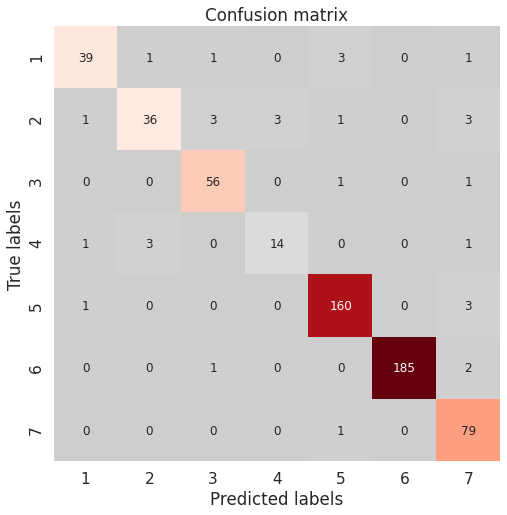

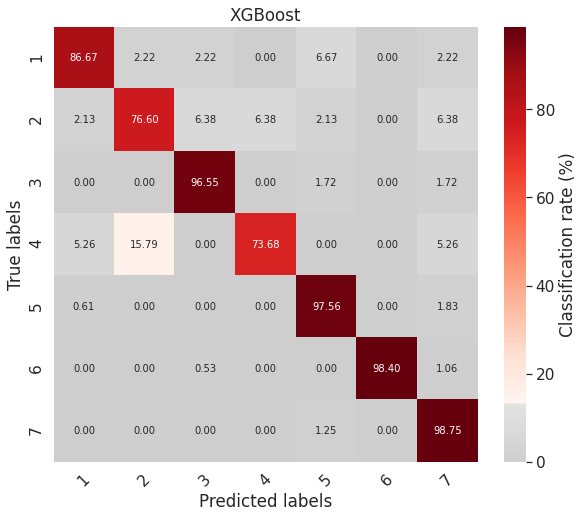

Accuracy: 0.9467554076539102: Misclassification: 0.0532445923460898
              precision    recall  f1-score   support

           1       0.93      0.87      0.90        45
           2       0.90      0.77      0.83        47
           3       0.92      0.97      0.94        58
           4       0.82      0.74      0.78        19
           5       0.96      0.98      0.97       164
           6       1.00      0.98      0.99       188
           7       0.88      0.99      0.93        80

    accuracy                           0.95       601
   macro avg       0.92      0.90      0.90       601
weighted avg       0.95      0.95      0.95       601



In [11]:
clf = sf.ensemble_learning(obj, group_by="labels0", classifier="XGBoost", balance=True, verbose=True)

#### gini_importance

In [12]:
selectedGenes, selectedGenes_dict = sf.gini_importance(obj, clf, group_by="labels0", verbose=True, restrict_top=("local", 20))

In [13]:
e2 = time.time()

#### Classifiers

<Figure size 432x288 with 0 Axes>

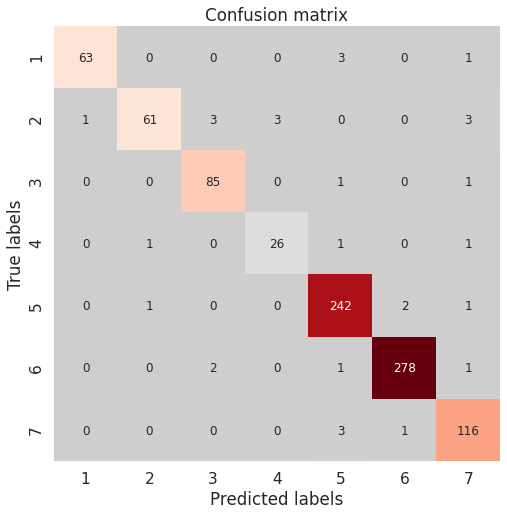

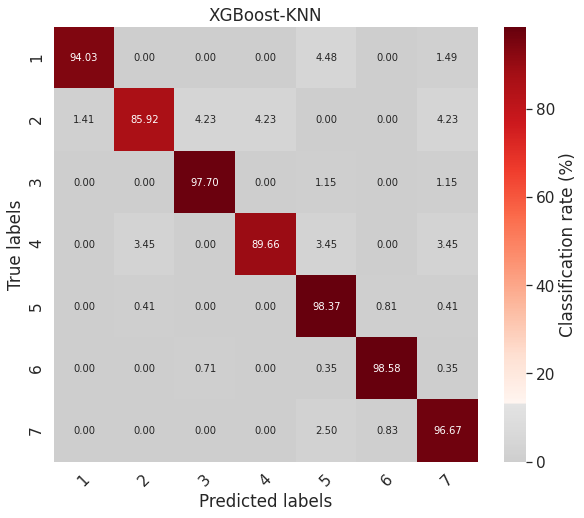

Accuracy: 0.9656319290465631: Misclassification: 0.03436807095343686
              precision    recall  f1-score   support

           1       0.98      0.94      0.96        67
           2       0.97      0.86      0.91        71
           3       0.94      0.98      0.96        87
           4       0.90      0.90      0.90        29
           5       0.96      0.98      0.97       246
           6       0.99      0.99      0.99       282
           7       0.94      0.97      0.95       120

    accuracy                           0.97       902
   macro avg       0.95      0.94      0.95       902
weighted avg       0.97      0.97      0.97       902



In [14]:
sf.run_classifiers(obj, group_by="labels0", genes=selectedGenes, classifier="KNN", balance=True, title="XGBoost-KNN")

#### Sorting genes per cluster

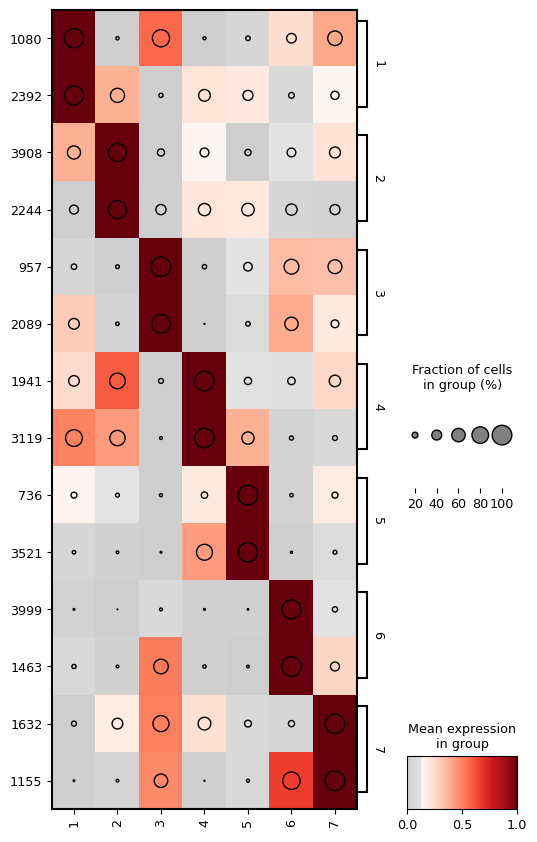

In [15]:
axs, selectedGenes_top_dict = sf.sort_and_plot(obj, selectedGenes, group_by="labels0", top=2, figsize=(6,10), restricted=False)

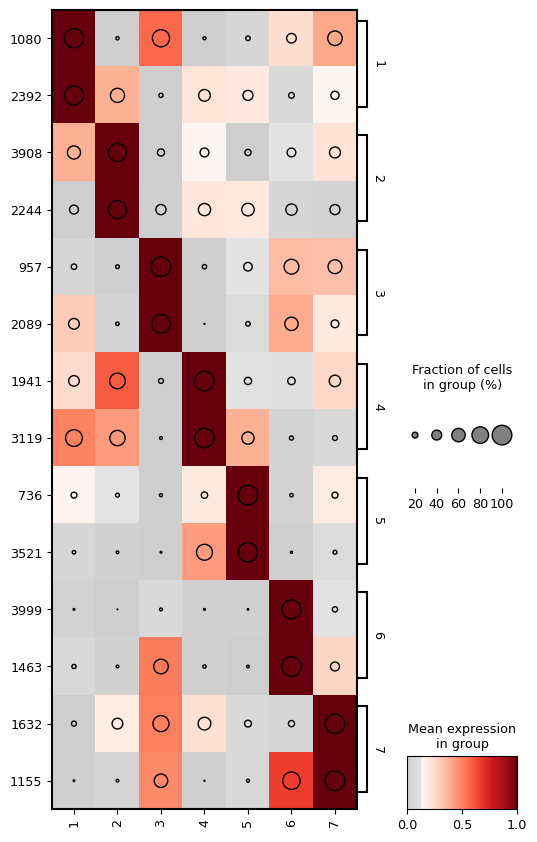

In [16]:
axs.savefig("Figures/XGBoost_top5_perGroup.pdf")

# Elapsed time

In [17]:
print("%d genes across %s cells"%(obj.n_vars, obj.n_obs))

4000 genes across 3005 cells


In [18]:
print('Elapsed time (s): ', e2-s2)

Elapsed time (s):  12.77565336227417
